## Stock Price Forecasting using ARIMA

In [ ]:
pip install yfinance 

In [1]:
import yfinance as yf

stock_symbol = "AAPL"  # You can change this to any valid stock symbol
start_date = "2020-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
Visualize the Stock Data

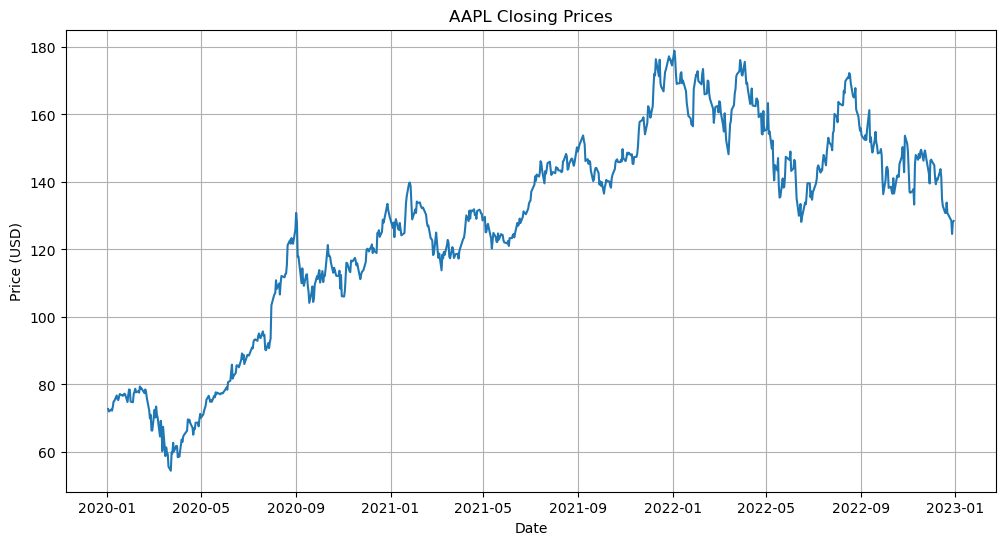

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'])
plt.title(f'{stock_symbol} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

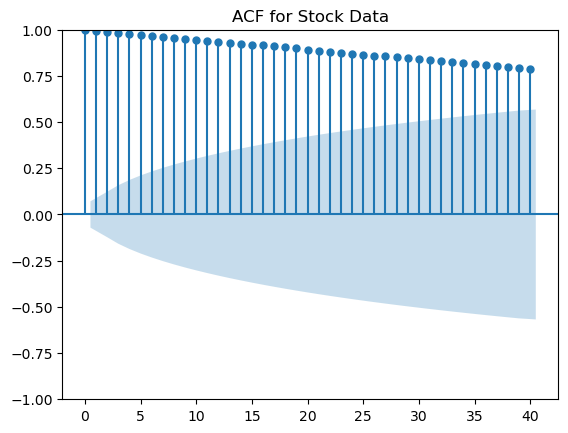

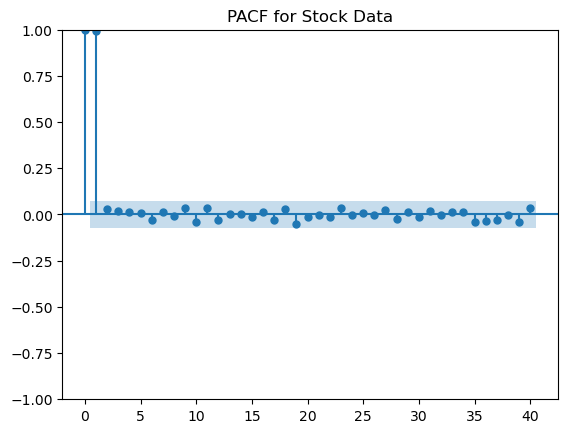

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(stock_data['Close'], lags=40)
plt.title('ACF for Stock Data')
plt.show()

plot_pacf(stock_data['Close'], lags=40)
plt.title('PACF for Stock Data')
plt.show()


In [4]:
stock_data_clean = stock_data['Close'].dropna()
train_size = int(len(stock_data_clean) * 0.8)
train_data, test_data = stock_data_clean[:train_size], stock_data_clean[train_size:]


In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(5, 1, 0))  # Example ARIMA(5,1,0)
fitted_model = model.fit()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
forecast = fitted_model.forecast(steps=len(test_data))
forecast_index = test_data.index


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


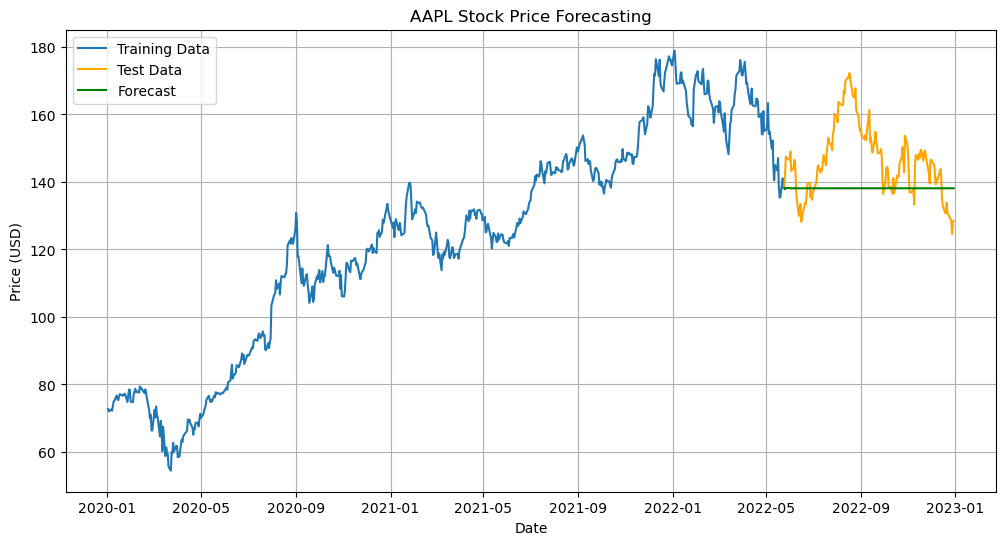

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title(f'{stock_symbol} Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 13.416143663461021


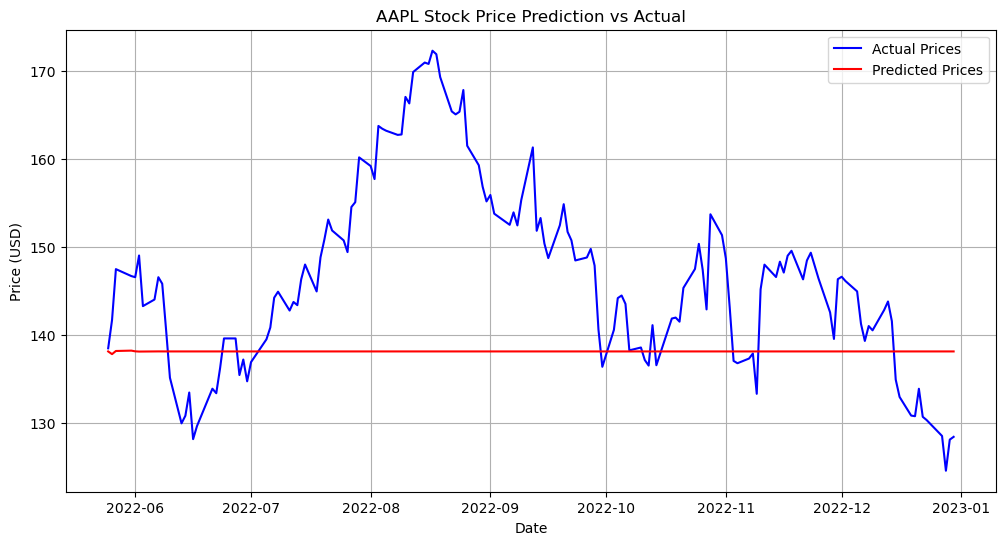

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast, label='Predicted Prices', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
